<a href="https://colab.research.google.com/github/xCocco0/alzheimer-recognition/blob/main/alzheimer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title
This is the description of the project.

---
### Import modules

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

### Load data

In [111]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/oasis3-normalized.csv")

In [112]:
df.groupby('cdr').mean()

,sex,age,height,weight,education,hand,mmse,eTIV,brainVol,nWBV,ventricleVol,ventricleRatio,hcVol,hcRatio
cdr,,,,,,,,,,,,,,
0.0,0.418680,66.637681,1678.135266,78.782609,15.916264,0.932367,28.948470,1.488211e+06,893793.161031,0.603552,32827.032206,0.021581,7530.969404,0.005117
0.5,0.576087,73.510870,1677.125000,75.826087,15.125000,0.923913,26.570652,1.543344e+06,867984.847826,0.564715,48332.695652,0.030517,6439.597826,0.004229
1.0,0.453333,72.626667,1654.080000,72.506667,14.440000,0.920000,21.453333,1.528822e+06,838369.573333,0.550697,48135.200000,0.030833,5831.413333,0.003865
2.0,0.562500,72.500000,1670.000000,69.000000,14.875000,1.000000,12.875000,1.600948e+06,828435.000000,0.518082,64713.000000,0.040149,5173.875000,0.003247


### Graphs

---
# TEST

In [113]:
# for conversion
index2color = {0:'#64C4E480', 1:'#FFA000A0', 2:'#FF7000A0', 3:'#FF0000A0'}
index2label = {0:'Non demented', 1:'Very mild dementia', 2:'Mild dementia', 3:'Moderate dementia'}
index2cdr = {0:0.0, 1:0.5, 2:1.0, 3:2.0}
cdr2index = {0.0:0, 0.5:1, 1.0:2, 2.0:3}

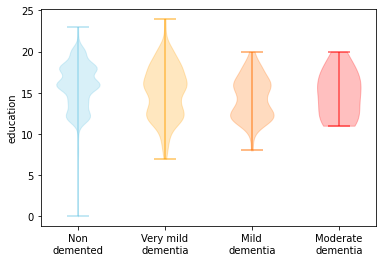

In [114]:
fig, ax = plt.subplots()

index = 0
for i in [0,0.5,1,2]:
  parts = ax.violinplot([
               df[df.cdr == i]['education'].to_numpy(dtype = float),
              ], [index+1])

  parts['bodies'][0].set_color(index2color[index])
  parts['cbars'].set_color(index2color[index])
  parts['cmins'].set_color(index2color[index])
  parts['cmaxes'].set_color(index2color[index])
  parts['bodies'][0].set_alpha(0.25)
  index += 1

ax.set_xticks([1,2,3,4])
ax.set_xticklabels(['Non\ndemented', 'Very mild\ndementia', 'Mild\ndementia', 'Moderate\ndementia'])
ax.set_ylabel('education')
plt.show()

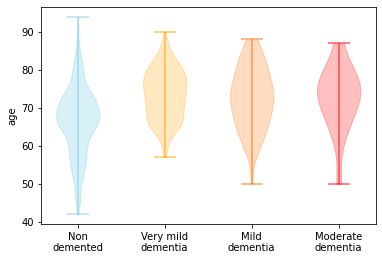

In [115]:
fig, ax = plt.subplots()

index = 0
for i in [0,0.5,1,2]:
  parts = ax.violinplot([
               df[df.cdr == i]['age'].to_numpy(dtype = float),
              ], [index+1])

  parts['bodies'][0].set_color(index2color[index])
  parts['cbars'].set_color(index2color[index])
  parts['cmins'].set_color(index2color[index])
  parts['cmaxes'].set_color(index2color[index])
  parts['bodies'][0].set_alpha(0.25)
  index += 1

ax.set_xticks([1,2,3,4])
ax.set_xticklabels(['Non\ndemented', 'Very mild\ndementia', 'Mild\ndementia', 'Moderate\ndementia'])
ax.set_ylabel('age')
plt.show()

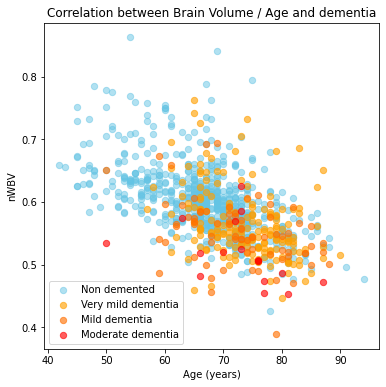

In [116]:
fig, ax = plt.subplots(figsize=(6, 6))

for i in range(0,4):
  ax.scatter(df[df.cdr == index2cdr[i]]['age'], df[df.cdr == index2cdr[i]]['nWBV'],
             c = index2color[i], label = index2label[i], s = 40)

ax.legend()
ax.set_title("Correlation between Brain Volume / Age and dementia")
plt.xlabel('Age (years)')
plt.ylabel('nWBV')
plt.show()

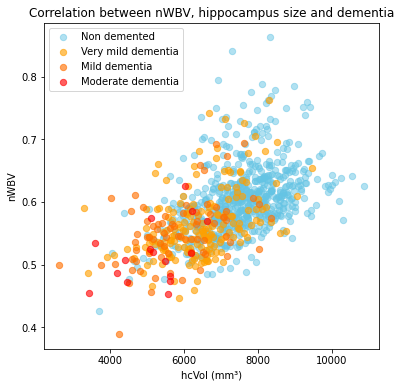

In [117]:
fig, ax = plt.subplots(figsize=(6, 6))

for i in range(0,4):
  ax.scatter(df[df.cdr == index2cdr[i]]['hcVol'], df[df.cdr == index2cdr[i]]['nWBV'],
             c = index2color[i], label = index2label[i], s = 40)

ax.legend()
ax.set_title("Correlation between nWBV, hippocampus size and dementia")
plt.xlabel('hcVol (mm\u00B3)')
plt.ylabel('nWBV')
plt.show()

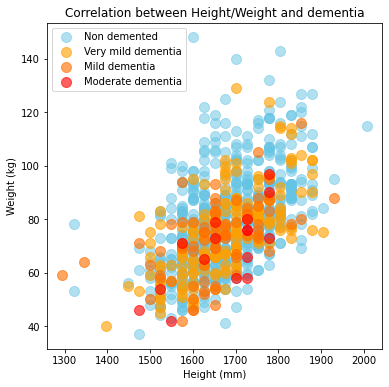

In [118]:
fig, ax = plt.subplots(figsize=(6,6))

for i in range(0,4):
  ax.scatter(df[df.cdr == index2cdr[i]]['height'], df[df.cdr == index2cdr[i]]['weight'],
             c = index2color[i], label = index2label[i], s = 100)

ax.legend()
ax.set_title("Correlation between Height/Weight and dementia")
plt.xlabel('Height (mm)')
plt.ylabel('Weight (kg)')
plt.show()

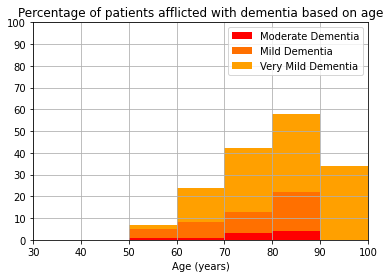

In [119]:
delta = 10
numbars = 10
hist = np.zeros((numbars,5))
hist_labels = np.arange(delta/2,delta*(numbars+1/2),delta)

for index, row in df.iterrows():
  hist[int(row["age"]/delta), cdr2index[row["cdr"]]+1] += 1
  hist[int(row["age"]/delta), 0] += 1
#print(hist)
for row in hist:
  for i in range(1,5):
    if row[0] == 0:
      row[i] = 0
    else:
      row[i] = np.ceil(100 * row[i] / row[0])
#print(hist)

fig, ax = plt.subplots()
ax.bar(hist_labels, hist[:,4], width = 10, color = "#FF0000", label = "Moderate Dementia")
ax.bar(hist_labels, hist[:,3], width = 10, bottom = hist[:,4], color = "#FF7000", label = "Mild Dementia")
ax.bar(hist_labels, hist[:,2], width = 10, bottom = hist[:,4]+hist[:,3], color = "#FFA000", label = "Very Mild Dementia")
#ax.bar(hist_labels, hist[:,1], width = 10, bottom = hist[:,4]+hist[:,3]+hist[:,2], color = "#64C4E4")

ax.set_title("Percentage of patients afflicted with dementia based on age")
ax.set_ylim(0,100)
ax.set_xlim(30,100)
ax.set_yticks(range(0,101,10))
ax.grid()
ax.set_xlabel("Age (years)")
ax.legend()
plt.show()


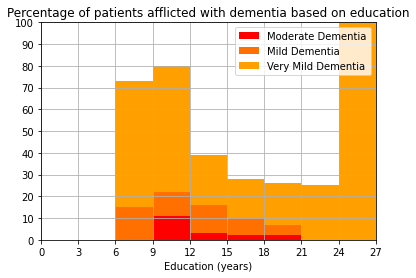

In [120]:
delta = 3
numbars = 9
hist = np.zeros((numbars,5))
hist_labels = np.arange(delta/2,delta*(numbars+1/2),delta)

for index, row in df.iterrows():
  hist[int(row["education"]/delta), cdr2index[row["cdr"]]+1] += 1
  hist[int(row["education"]/delta), 0] += 1
#print(hist)
for row in hist:
  for i in range(1,5):
    if row[0] == 0:
      row[i] = 0
    else:
      row[i] = np.ceil(100 * row[i] / row[0])
#print(hist)

fig, ax = plt.subplots()
ax.bar(hist_labels, hist[:,4], width = delta, color = "#FF0000", label = "Moderate Dementia")
ax.bar(hist_labels, hist[:,3], width = delta, bottom = hist[:,4], color = "#FF7000", label = "Mild Dementia")
ax.bar(hist_labels, hist[:,2], width = delta, bottom = hist[:,4]+hist[:,3], color = "#FFA000", label = "Very Mild Dementia")
#ax.bar(hist_labels, hist[:,1], width = 10, bottom = hist[:,4]+hist[:,3]+hist[:,2], color = "#64C4E4")
ax.set_title("Percentage of patients afflicted with dementia based on education")
ax.set_ylim(0,100)
ax.set_xlim(0,delta*numbars)
ax.set_xticks(range(0,delta*numbars+1,delta))
ax.set_yticks(range(0,101,10))
ax.grid()
ax.set_xlabel("Education (years)")
ax.legend()
plt.show()

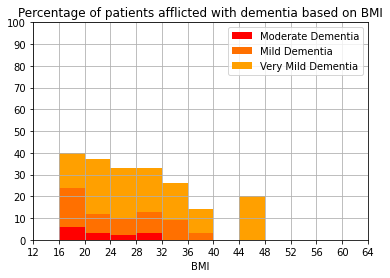

In [121]:
delta = 4
numbars = 20
hist = np.zeros((numbars,5))
hist_labels = np.arange(delta/2,delta*(numbars+1/2),delta)

dfbmi = df.loc[:,["height","weight","cdr"]]
dfbmi["bmi"] = (1000000*df["weight"])/(df["height"]**2)
#print(dfbmi)

for index, row in dfbmi.iterrows():
  hist[int(row["bmi"]/delta), cdr2index[row["cdr"]]+1] += 1
  hist[int(row["bmi"]/delta), 0] += 1
#print(hist)
for row in hist:
  for i in range(1,5):
    if row[0] == 0:
      row[i] = 0
    else:
      row[i] = np.ceil(100 * row[i] / row[0])
#print(hist)

fig, ax = plt.subplots()
ax.bar(hist_labels, hist[:,4], width = delta, color = "#FF0000", label = "Moderate Dementia")
ax.bar(hist_labels, hist[:,3], width = delta, bottom = hist[:,4], color = "#FF7000", label = "Mild Dementia")
ax.bar(hist_labels, hist[:,2], width = delta, bottom = hist[:,4]+hist[:,3], color = "#FFA000", label = "Very Mild Dementia")
#ax.bar(hist_labels, hist[:,1], width = 10, bottom = hist[:,4]+hist[:,3]+hist[:,2], color = "#64C4E4")
ax.set_title("Percentage of patients afflicted with dementia based on BMI")
ax.set_ylim(0,100)
ax.set_xlim(12,48)
ax.set_xticks(range(12,delta*16+1,delta))
ax.set_yticks(range(0,101,10))
ax.grid()
ax.set_xlabel("BMI")
ax.legend()
plt.show()

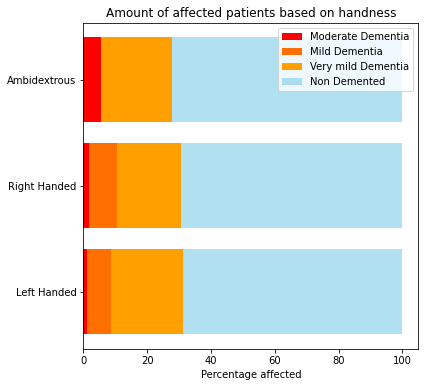

In [122]:
fig, ax = plt.subplots(figsize=(6,6))
bars = np.empty((4,3))

for i in range(0,4):
  for j in range(0,3):
    bars[i,j] = df[(df.hand == j) & (df.cdr == index2cdr[i])].loc[:,"id"].count()
#print(handness)
for i in range(0,3):
  bars[:,i] /= np.sum(bars[:,i])
bars = (bars*100)
#print(bars)
colormap = {0.0:'#64C4E480', 0.5:'#FFA000A0', 1.0:'#FF7000A0', 2.0:'#FF0000A0'}
ax.barh([1,2,3], bars[3,:], color = "#FF0000", label = "Moderate Dementia")
ax.barh([1,2,3], bars[2,:], left = bars[3,:], color = "#FF7000", label = "Mild Dementia")
ax.barh([1,2,3], bars[1,:], left = bars[3,:]+bars[2,:], color = "#FFA000", label = "Very mild Dementia")
ax.barh([1,2,3], bars[0,:], left = bars[3,:]+bars[2,:]+bars[1,:], color = "#64C4E480", label = "Non Demented")
ax.set_yticks([1,2,3])
ax.set_yticklabels(['Left Handed','Right Handed','Ambidextrous'])
ax.set_xlabel("Percentage affected")
ax.set_title("Amount of affected patients based on handness")
ax.legend()
plt.show()

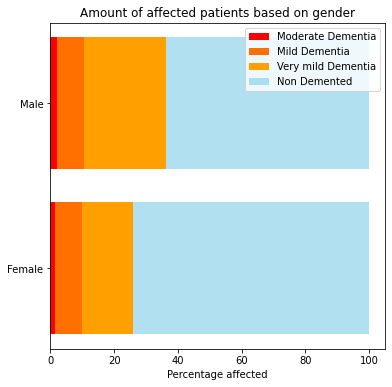

In [123]:
fig, ax = plt.subplots(figsize=(6,6))
bars = np.empty((4,2))

for i in range(0,4):
  for j in range(0,2):
    bars[i,j] = df[(df.sex == j) & (df.cdr == index2cdr[i])].loc[:,"id"].count()
#print(bars)
for i in range(0,2):
  bars[:,i] /= np.sum(bars[:,i])
bars = (bars*100)
#print(bars)
colormap = {0.0:'#64C4E480', 0.5:'#FFA000A0', 1.0:'#FF7000A0', 2.0:'#FF0000A0'}
ax.barh([1,2], bars[3,:], color = "#FF0000", label = "Moderate Dementia")
ax.barh([1,2], bars[2,:], left = bars[3,:], color = "#FF7000", label = "Mild Dementia")
ax.barh([1,2], bars[1,:], left = bars[3,:]+bars[2,:], color = "#FFA000", label = "Very mild Dementia")
ax.barh([1,2], bars[0,:], left = bars[3,:]+bars[2,:]+bars[1,:], color = "#64C4E480", label = "Non Demented")
ax.set_yticks([1,2])
ax.set_yticklabels(['Female','Male'])
ax.set_xlabel("Percentage affected")
ax.set_title("Amount of affected patients based on gender")
ax.legend()
plt.show()

---
# Training

In [124]:
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

NameError: ignored

# References
- https://www.oasis-brains.org/
- https://www.oasis-brains.org/files/OASIS-3_Imaging_Data_Dictionary_v1.5.pdf
- https://surfer.nmr.mgh.harvard.edu/fswiki/MorphometryStats
- http://www.ajnr.org/content/22/8/1483
- https://jamanetwork.com/journals/jamaneurology/fullarticle/775393
- http://perspectivesinmedicine.cshlp.org/content/2/4/a006213.long
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5390933/
- https://link.springer.com/article/10.1007/s00415-008-0750-9